Import Libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import ensemble
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt

Read Data

In [ ]:
dfbtc= pd.read_csv("/content/BTC2019-2024.csv")
dfbnb= pd.read_csv("/content/BNB2019-2024.csv")
dfeth= pd.read_csv("/content/ETH2019-2024.csv")

In [ ]:
dfbtc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1815 entries, 0 to 1814
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1815 non-null   int64  
 1   Date        1815 non-null   object 
 2   Open        1815 non-null   float64
 3   High        1815 non-null   float64
 4   Low         1815 non-null   float64
 5   Close       1815 non-null   float64
 6   Adj Close   1815 non-null   float64
 7   Volume      1815 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 113.6+ KB


EDA

In [ ]:
dfbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1815 entries, 0 to 1814
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1815 non-null   int64  
 1   Date        1815 non-null   object 
 2   Open        1815 non-null   float64
 3   High        1815 non-null   float64
 4   Low         1815 non-null   float64
 5   Close       1815 non-null   float64
 6   Adj Close   1815 non-null   float64
 7   Volume      1815 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 113.6+ KB


In [ ]:
dfeth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1815 entries, 0 to 1814
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1815 non-null   int64  
 1   Date        1815 non-null   object 
 2   Open        1815 non-null   float64
 3   High        1815 non-null   float64
 4   Low         1815 non-null   float64
 5   Close       1815 non-null   float64
 6   Adj Close   1815 non-null   float64
 7   Volume      1815 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 113.6+ KB


In [ ]:
dfbtc.describe()

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume
count,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1.815000e+03
mean,907.000000,25770.850601,26354.293694,25152.083263,25794.935568,25794.935568,2.969893e+10
std,524.089687,15957.123757,16357.788930,15500.299472,15956.336862,15956.336862,1.780033e+10
min,0.000000,3759.832520,3867.381836,3733.749756,3761.557129,3761.557129,5.331173e+09
25%,453.500000,10248.291015,10420.077149,10018.912110,10251.122558,10251.122558,1.787210e+10
50%,907.000000,23446.320313,23919.890625,22985.070313,23471.871094,23471.871094,2.612345e+10
75%,1360.500000,38337.583985,39496.312500,37265.291016,38351.751953,38351.751953,3.668631e+10
max,1814.000000,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [ ]:
dfbnb.describe()

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume
count,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1.815000e+03
mean,907.000000,211.126504,217.095221,204.768936,211.285576,211.285576,1.127327e+09
std,524.089687,171.852555,177.127735,165.990498,171.747380,171.747380,1.392933e+09
min,0.000000,9.365420,10.236060,6.963391,9.386050,9.386050,8.942123e+07
25%,453.500000,24.755992,25.801561,23.650312,24.914812,24.914812,3.232541e+08
50%,907.000000,241.489670,245.642197,237.140396,241.544510,241.544510,5.793600e+08
75%,1360.500000,317.066117,325.004684,310.196945,317.167710,317.167710,1.470920e+09
max,1814.000000,676.315918,690.931946,634.549500,675.684082,675.684082,1.798295e+10


In [ ]:
dfeth.describe()

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume
count,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1.815000e+03
mean,907.000000,1476.663778,1517.513220,1432.315756,1477.915707,1477.915707,1.457837e+10
std,524.089687,1156.946365,1190.363297,1118.933012,1156.457666,1156.457666,9.837620e+09
min,0.000000,110.406784,116.021622,95.184303,110.605873,110.605873,2.081626e+09
25%,453.500000,253.753479,263.718200,244.413322,255.537415,255.537415,7.602948e+09
50%,907.000000,1567.680786,1607.033081,1537.182251,1567.846069,1567.846069,1.209821e+10
75%,1360.500000,2118.864868,2171.555664,2058.898804,2120.293701,2120.293701,1.853139e+10
max,1814.000000,4810.071289,4891.704590,4718.039063,4812.087402,4812.087402,8.448291e+10


In [ ]:
dfbtc.tail()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
1810,1810,2024-02-13,49941.359375,50358.390625,48406.496094,49742.441406,49742.441406,35593051468
1811,1811,2024-02-14,49733.445313,52021.371094,49296.832031,51826.695313,51826.695313,39105608050
1812,1812,2024-02-15,51836.785156,52820.066406,51371.628906,51938.554688,51938.554688,38564360533
1813,1813,2024-02-16,51937.726563,52537.968750,51641.367188,52160.203125,52160.203125,28180567298
1814,1814,2024-02-17,52161.675781,52180.582031,51558.039063,51724.253906,51724.253906,22865082368


In [ ]:
dfbnb.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2019-03-01,10.356931,11.607489,10.325634,11.393217,11.393217,117838677
1,1,2019-03-02,11.384693,11.915753,10.960816,11.869744,11.869744,120807894
2,2,2019-03-03,11.845305,11.964979,11.352064,11.537903,11.537903,89868246
3,3,2019-03-04,11.538013,11.599405,11.070543,11.545945,11.545945,89421231
4,4,2019-03-05,11.520388,13.841443,11.520388,13.811967,13.811967,237026335


In [ ]:
dfeth.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2019-03-01,136.836243,138.995270,136.434784,136.443619,136.443619,3756124824
1,1,2019-03-02,136.350082,137.184799,132.436386,134.206955,134.206955,3747176425
2,2,2019-03-03,134.786118,135.849289,131.328857,132.249420,132.249420,3454374053
3,3,2019-03-04,132.157883,132.729141,125.402702,127.774124,127.774124,4008171341
4,4,2019-03-05,127.792953,138.229980,126.735298,137.822388,137.822388,4764849990


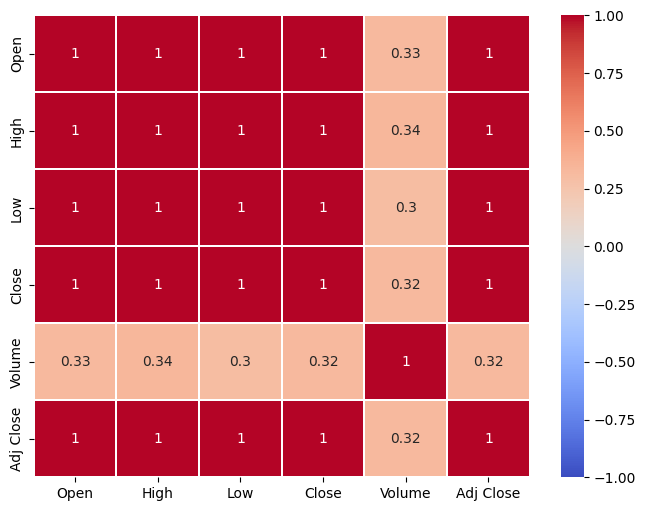

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(dfbtc[['Open','High','Low','Close','Volume','Adj Close']].corr(),
            vmin=-1.0, vmax=1.0, annot=True, cmap='coolwarm', linewidths=0.1)
plt.show()

In [ ]:
btc_mini = dfbtc.iloc[-200:]
eth_mini = dfeth.iloc[-200:]

fig = go.Figure(data=[go.Candlestick(x=btc_mini.index, open=btc_mini['Open'], high=btc_mini['High'], low=btc_mini['Low'], close=btc_mini['Close'])])
fig.update_xaxes(title_text="$")
fig.update_yaxes(title_text="Index")
fig.update_layout(title="Bitcoin Price, 200 Last Minutes")
fig.show()

fig = go.Figure(data=[go.Candlestick(x=eth_mini.index, open=eth_mini['Open'], high=eth_mini['High'], low=eth_mini['Low'], close=eth_mini['Close'])])
fig.update_xaxes(title_text="$")
fig.update_yaxes(title_text="Index")
fig.update_layout(title="Ethereum Price, 200 Last Minutes")
fig.show()

Encoding data

In [ ]:
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
le=LabelEncoder()
#Bitcoin
dfbtc['Date']=le.fit_transform(dfbtc['Date'])
dfbtc['Open']=le.fit_transform(dfbtc['Open'])
dfbtc['High']=le.fit_transform(dfbtc['High'])
dfbtc['Low']=le.fit_transform(dfbtc['Low'])
dfbtc['Close']=le.fit_transform(dfbtc['Close'])
dfbtc['Adj Close']=le.fit_transform(dfbtc['Adj Close'])
dfbtc['Volume']=le.fit_transform(dfbtc['Volume'])

#Binance
dfbnb['Date']=le.fit_transform(dfbnb['Date'])
dfbnb['Open']=le.fit_transform(dfbnb['Open'])
dfbnb['High']=le.fit_transform(dfbnb['High'])
dfbnb['Low']=le.fit_transform(dfbnb['Low'])
dfbnb['Close']=le.fit_transform(dfbnb['Close'])
dfbnb['Adj Close']=le.fit_transform(dfbnb['Adj Close'])
dfbnb['Volume']=le.fit_transform(dfbnb['Volume'])

#Ethereum
dfeth['Date']=le.fit_transform(dfeth['Date'])
dfeth['Open']=le.fit_transform(dfeth['Open'])
dfeth['High']=le.fit_transform(dfeth['High'])
dfeth['Low']=le.fit_transform(dfeth['Low'])
dfeth['Close']=le.fit_transform(dfeth['Close'])
dfeth['Adj Close']=le.fit_transform(dfeth['Adj Close'])
dfeth['Volume']=le.fit_transform(dfeth['Volume'])

In [ ]:
#Bitcoin
x_btc=dfbtc.drop(columns=['Close'])
y_btc=dfbtc['Close']
#Binance
x_bnb=dfbnb.drop(columns=['Close'])
y_bnb=dfbnb['Close']
#Ethereum
x_eth=dfeth.drop(columns=['Close'])
y_eth=dfeth['Close']

In [ ]:
#Reshape
y_btc=y_btc.values.reshape(-1,1)
y_bnb=y_bnb.values.reshape(-1,1)
y_eth=y_eth.values.reshape(-1,1)



In [ ]:
scaler=MinMaxScaler()
#Bitcoin
x_btc=scaler.fit_transform(x_btc)
y_btc=scaler.fit_transform(y_btc)
#Binance
x_bnb=scaler.fit_transform(x_bnb)
y_bnb=scaler.fit_transform(y_bnb)
#Ethereum
x_eth=scaler.fit_transform(x_eth)
y_eth=scaler.fit_transform(y_eth)

Split Data

In [ ]:
#Split dataste to 8:2
X_btc_train_1,X_btc_test_1,y_btc_train_1,y_btc_test_1=train_test_split(x_btc,y_btc,test_size=0.2,shuffle=True,random_state=42)

X_bnb_train_1,X_bnb_test_1,y_bnb_train_1,y_bnb_test_1=train_test_split(x_bnb,y_bnb,test_size=0.2,shuffle=True,random_state=42)

X_eth_train_1,X_eth_test_1,y_eth_train_1,y_eth_test_1=train_test_split(x_eth,y_eth,test_size=0.2,shuffle=True,random_state=42)

In [29]:
#Split dataset to 7:3
X_btc_train_2,X_btc_test_2,y_btc_train_2,y_btc_test_2=train_test_split(x_btc,y_btc,test_size=0.3,shuffle=True,random_state=42)

X_bnb_train_2,X_bnb_test_2,y_bnb_train_2,y_bnb_test_2=train_test_split(x_bnb,y_bnb,test_size=0.3,shuffle=True,random_state=42)

X_eth_train_2,X_eth_test_2,y_eth_train_2,y_eth_test_2=train_test_split(x_eth,y_eth,test_size=0.3,shuffle=True,random_state=42)

In [ ]:
#Split dataset to 6:4
X_btc_train_3,X_btc_test_3,y_btc_train_3,y_btc_test_3=train_test_split(x_btc,y_btc,test_size=0.4,shuffle=True,random_state=42)

X_bnb_train_3,X_bnb_test_3,y_bnb_train_3,y_bnb_test_3=train_test_split(x_bnb,y_bnb,test_size=0.4,shuffle=True,random_state=42)

X_eth_train_3,X_eth_test_3,y_eth_train_3,y_eth_test_3=train_test_split(x_eth,y_eth,test_size=0.4,shuffle=True,random_state=42)

Train Model

In [ ]:
model = GradientBoostingRegressor()

In [25]:
model.fit(X_btc_train_1,y_btc_train_1)
y_btc_pred_1 = model.predict(X_btc_test_1)

mse = mean_squared_error(y_btc_test_1, y_btc_pred_1)
print(mse)

rmse = sqrt(mean_squared_error(y_btc_test_1,y_btc_pred_1))
print(rmse)

mape = mean_absolute_percentage_error(y_btc_test_1,y_btc_pred_1)
print(mape)

21.518632751354918
4.638818033869718
0.00785624039080517


In [33]:
model.fit(X_btc_train_2,y_btc_train_2)
y_btc_pred_2 = model.predict(X_btc_test_2)

mse = mean_squared_error(y_btc_test_2, y_btc_pred_2)
print(mse)

rmse = sqrt(mean_squared_error(y_btc_test_2,y_btc_pred_2))
print(rmse)

mape = mean_absolute_percentage_error(y_btc_test_2,y_btc_pred_2)
print(mape)

22.431459359137015
4.736186161790625
0.007927645900277015


In [34]:
model.fit(X_btc_train_3,y_btc_train_3)
y_btc_pred_3 = model.predict(X_btc_test_3)

mse = mean_squared_error(y_btc_test_3, y_btc_pred_3)
print(mse)

rmse = sqrt(mean_squared_error(y_btc_test_3,y_btc_pred_3))
print(rmse)

mape = mean_absolute_percentage_error(y_btc_test_3,y_btc_pred_3)
print(mape)

22.05147544850445
4.695899855033586
0.00844134598743579


In [35]:
model.fit(X_bnb_train_1,y_bnb_train_1)
y_bnb_pred_1= model.predict(X_bnb_test_1)

mse = mean_squared_error(y_bnb_test_1, y_bnb_pred_1)
print(mse)

rmse = sqrt(mean_squared_error(y_bnb_test_1,y_bnb_pred_1))
print(rmse)

mape = mean_absolute_percentage_error(y_bnb_test_1,y_bnb_pred_1)
print(mape)

17.287902710307687
4.1578723778283155
71666296307856.2


In [30]:
model.fit(X_bnb_train_2,y_bnb_train_2)
y_bnb_pred_2= model.predict(X_bnb_test_2)

mse = mean_squared_error(y_bnb_test_2, y_bnb_pred_2)
print(mse)

rmse = sqrt(mean_squared_error(y_bnb_test_2,y_bnb_pred_2))
print(rmse)

mape = mean_absolute_percentage_error(y_bnb_test_2,y_bnb_pred_2)
print(mape)

21.210661182978974
4.605503358263782
48754585483282.24


In [36]:
model.fit(X_bnb_train_3,y_bnb_train_3)
y_bnb_pred_3= model.predict(X_bnb_test_3)

mse = mean_squared_error(y_bnb_test_3, y_bnb_pred_3)
print(mse)

rmse = sqrt(mean_squared_error(y_bnb_test_3,y_bnb_pred_3))
print(rmse)

mape = mean_absolute_percentage_error(y_bnb_test_3,y_bnb_pred_3)
print(mape)

20.37560296866051
4.513934311513683
40860689668897.516


In [37]:
model.fit(X_eth_train_1,y_eth_train_1)
y_eth_pred_1= model.predict(X_eth_test_1)

mse = mean_squared_error(y_eth_test_1, y_eth_pred_1)
print(mse)

rmse = sqrt(mean_squared_error(y_eth_test_1,y_eth_pred_1))
print(rmse)

mape = mean_absolute_percentage_error(y_eth_test_1,y_eth_pred_1)
print(mape)

18.810875252787415
4.3371505914352815
63776000884260.43


In [38]:
model.fit(X_eth_train_2,y_eth_train_2)
y_eth_pred_2= model.predict(X_eth_test_2)

mse = mean_squared_error(y_eth_test_2, y_eth_pred_2)
print(mse)

rmse = sqrt(mean_squared_error(y_eth_test_2,y_eth_pred_2))
print(rmse)

mape = mean_absolute_percentage_error(y_eth_test_2,y_eth_pred_2)
print(mape)

20.421017230474437
4.518961963822492
25883719109651.99


In [32]:
model.fit(X_eth_train_3,y_eth_train_3)
y_eth_pred_3= model.predict(X_eth_test_3)

mse = mean_squared_error(y_eth_test_3, y_eth_pred_3)
print(mse)

rmse = sqrt(mean_squared_error(y_eth_test_3,y_eth_pred_3))
print(rmse)

mape = mean_absolute_percentage_error(y_eth_test_3,y_eth_pred_3)
print(mape)

23.340596589684413
4.8312106753571005
48824942731540.21


In [ ]:
from numpy import array

x_input = X_test_bnb_[60:].reshape(1, -1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

lst_output = []
n_steps = 100
i = 0
while(i < 90):

    if(len(temp_input) > 100):
        # Lấy đúng 100 phần tử cuối cùng
        x_input = np.array(temp_input[-100:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, n_steps, 1))
        # Dự đoán giá trị tiếp theo
        yhat = model_GRU.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        # Thêm giá trị dự đoán vào danh sách
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = np.array(temp_input).reshape((1, n_steps, 1))
        yhat = model_GRU.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1

In [ ]:
index_future_dates = pd.date_range(start='2023-02-18', end='2023-05-18')
pred_btc = y_btc_pred[-90:]

btc_pred = pd.DataFrame(pred_btc, index=index_future_dates, columns=['Bitcoin Pred'])

print(btc_pred.to_string())

            Bitcoin Pred
2023-02-18      0.367719
2023-02-19      0.655229
2023-02-20      0.888074
2023-02-21      0.474780
2023-02-22      0.459259
2023-02-23      0.620685
2023-02-24      0.744366
2023-02-25      0.218076
2023-02-26      0.735098
2023-02-27      0.725934
2023-02-28      0.181483
2023-03-01      0.360386
2023-03-02      0.603123
2023-03-03      0.589331
2023-03-04      0.632935
2023-03-05      0.672816
2023-03-06      0.690143
2023-03-07      0.857649
2023-03-08      0.944905
2023-03-09      0.800514
2023-03-10      0.132820
2023-03-11      0.824799
2023-03-12      0.209341
2023-03-13      0.900214
2023-03-14      0.179046
2023-03-15      0.881684
2023-03-16      0.368696
2023-03-17      0.338621
2023-03-18      0.762299
2023-03-19      0.061140
2023-03-20      0.408692
2023-03-21      0.132268
2023-03-22      0.033586
2023-03-23      0.806601
2023-03-24      0.693653
2023-03-25      0.306970
2023-03-26      0.449219
2023-03-27      0.521107
2023-03-28      0.185887


In [ ]:
model.fit(X_bnb_train,y_bnb_train)
y_bnb_pred = model.predict(X_bnb_test)

mse = mean_squared_error(y_bnb_test, y_bnb_pred)
print(mse)

rmse = sqrt(mean_squared_error(y_bnb_test,y_bnb_pred))
print(rmse)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



5.267483737926941e-06
0.002295099940727406


In [ ]:
index_future_dates = pd.date_range(start='2023-02-18', end='2023-05-18')
pred_bnb = y_bnb_pred[-90:]

bnb_pred = pd.DataFrame(pred_bnb, index=index_future_dates, columns=['Binance Pred'])

print(bnb_pred.to_string())

            Binance Pred
2023-02-18      0.636430
2023-02-19      0.467260
2023-02-20      0.953842
2023-02-21      0.688166
2023-02-22      0.638498
2023-02-23      0.504655
2023-02-24      0.765133
2023-02-25      0.130201
2023-02-26      0.539470
2023-02-27      0.803788
2023-02-28      0.086206
2023-03-01      0.521769
2023-03-02      0.768291
2023-03-03      0.753113
2023-03-04      0.512119
2023-03-05      0.638793
2023-03-06      0.443352
2023-03-07      0.869520
2023-03-08      0.942783
2023-03-09      0.676141
2023-03-10      0.182407
2023-03-11      0.948260
2023-03-12      0.167297
2023-03-13      0.759044
2023-03-14      0.097779
2023-03-15      0.689577
2023-03-16      0.616921
2023-03-17      0.285915
2023-03-18      0.835971
2023-03-19      0.195712
2023-03-20      0.440523
2023-03-21      0.182407
2023-03-22      0.250785
2023-03-23      0.864152
2023-03-24      0.709159
2023-03-25      0.216452
2023-03-26      0.480235
2023-03-27      0.429258
2023-03-28      0.152905


In [ ]:
model.fit(X_eth_train,y_eth_train)
y_eth_pred = model.predict(X_eth_test)

mse = mean_squared_error(y_eth_test, y_eth_pred)
mse

rmse = sqrt(mean_squared_error(y_eth_test,y_eth_pred))
print(rmse)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.0023847837752469544


In [ ]:
index_future_dates = pd.date_range(start='2023-02-18', end='2023-05-18')
pred_eth = y_eth_pred[-90:]

eth_pred = pd.DataFrame(pred_eth, index=index_future_dates, columns=['Bitcoin Pred'])

print(eth_pred.to_string())

            Bitcoin Pred
2023-02-18      0.432938
2023-02-19      0.655565
2023-02-20      0.950358
2023-02-21      0.560259
2023-02-22      0.583935
2023-02-23      0.681069
2023-02-24      0.819722
2023-02-25      0.232977
2023-02-26      0.732350
2023-02-27      0.812983
2023-02-28      0.163357
2023-03-01      0.412267
2023-03-02      0.695581
2023-03-03      0.711568
2023-03-04      0.661687
2023-03-05      0.722027
2023-03-06      0.616205
2023-03-07      0.886897
2023-03-08      0.757753
2023-03-09      0.774204
2023-03-10      0.132353
2023-03-11      0.924482
2023-03-12      0.132646
2023-03-13      0.819981
2023-03-14      0.232588
2023-03-15      0.830299
2023-03-16      0.424062
2023-03-17      0.338413
2023-03-18      0.836148
2023-03-19      0.154591
2023-03-20      0.372255
2023-03-21      0.119787
2023-03-22      0.088707
2023-03-23      0.882395
2023-03-24      0.719884
2023-03-25      0.313929
2023-03-26      0.415230
2023-03-27      0.538419
2023-03-28      0.150765
